In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

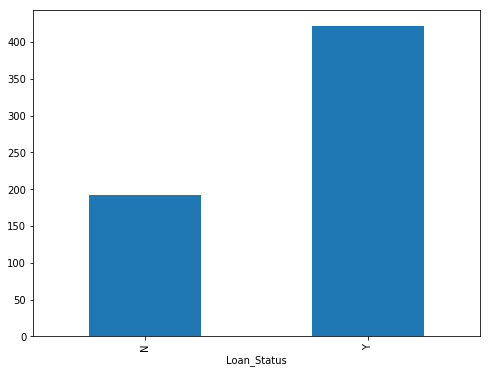

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
dataset.groupby('Loan_Status').Loan_ID.count().plot.bar(ylim=0)
plt.show()

In [4]:
# dataset.fillna(dataset.mean(), inplace=True)
dataset = dataset.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [5]:
dataset = pd.get_dummies(data=dataset, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'])

In [6]:
cols = dataset.columns.tolist()
cols.pop(cols.index('Loan_ID'))
cols.pop(cols.index('Loan_Status'))
dataset = dataset[cols+['Loan_Status']]

In [7]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler, Normalizer
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [10]:
#Apply PCA
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

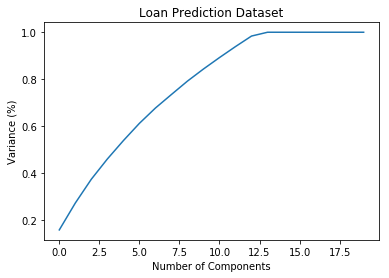

In [11]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Loan Prediction Dataset')
plt.show()

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

param_grid = {'C':[0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 10, 100, 100, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'random_state':[0, 1, 10]}
model = GridSearchCV(LogisticRegression(),param_grid,cv=5,scoring = 'accuracy')
model.fit(X_train, y_train)
print(model.best_params_)

{'C': 0.2, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}


In [13]:
classifier = LogisticRegression(C=0.1, penalty= 'l2', random_state=0, solver='liblinear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
score = classifier.score(X_test, y_test)
score

0.8373983739837398

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[15, 18],
       [ 2, 88]], dtype=int64)